1. Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc






(1.1)Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=(10,6)
import io 
!pip install -q xlrd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1.2)Uploading DataFile

In [2]:
from google.colab import files 
uploaded=files.upload()

Saving bank.xlsx to bank.xlsx


(1.3)Read file

In [3]:
x=pd.read_excel(open('/content/bank.xlsx', 'rb'),sheet_name='Data')  

(1.4)Print First and Last 5 rows

In [4]:
x.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
x.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


(1.5)Displaying number of rows and columns

In [6]:
x.shape

(5000, 14)

(1.6)Displaying DataType and Non-Null values of each column

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(1.7)Displaying Summary Stats (count,mean,median,std,min value and max value,quaters(1,3)

In [8]:
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


(1.8)Displaying number of null values in each column

In [9]:
x.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

2. Check if you need to clean the data for any of the variables

(2.1)There is a fault data which we can see in summary stats(1.7) that the value in experience columnm is in negative which is invalid.So, I choose to manipulate it with the median of that column(Experience column)

In [10]:
#checking negative values in experience column
neg=x.Experience<0
neg.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [11]:
#replacing negative values in experience column to median of that column
import warnings
warnings.filterwarnings('ignore')
mdn = int(x['Experience'].median())
for i in range(len(x)):
    if x['Experience'].iloc[i] < 0:
        x['Experience'].iloc[i] = mdn


In [12]:
#Display the count of negative values in experience column
x[x['Experience']<0]['Experience'].count()

0

In [13]:
#stats of experience
x['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

(2.2)Showing correlation between all columns 




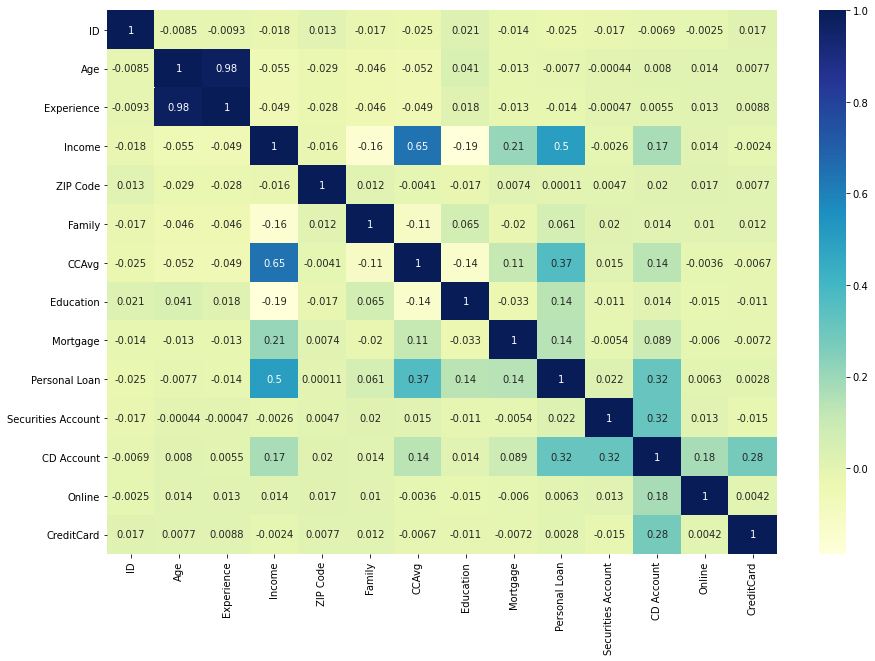

In [14]:
#shows correlation between all variables
bc=x.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bc,cmap="YlGnBu",annot=True)
#Age and experience has very strong correlation

(2.3) There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

In [15]:
x=x.drop(['ID'],axis=1)
x.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


(2.4)Changing data types of some variables to category 

In [16]:
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
x[var]=x[var].astype('category')
x.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

3. EDA: Study the data distribution in each attribute and target variable, share your
findings

(3.1)Unique Values in each column

In [17]:
uniqueValues = x.nunique()
print(uniqueValues)

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


 (3.2)Number of people having Zero Mortgage?

In [18]:
#This will count the number of persons having zero Mortgage
(x['Mortgage']==0).sum()

3462

In [19]:
#This is to show the different values of Mortgage and their count
x['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

(3.3)Number of people with zero credit card spending per month?

In [20]:
#This will count the number of persons having zero credit card spending per month
(x['CCAvg']==0).sum()

106

In [21]:
#This is to show the different values of Mortgage and their count
x['CCAvg'].value_counts()

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64

(3.4)Value counts of all categorical columns

In [22]:
#value count of ZIP Code column
print(x['ZIP Code'].value_counts())

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64


In [23]:
#value count of Family column
print(x['Family'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


In [24]:
#value count of Education column
print(x['Education'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64


In [25]:
#value count of Personal Loan column
print(x['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


In [26]:
#value count of Securities Account column
print(x['Securities Account'].value_counts())

0    4478
1     522
Name: Securities Account, dtype: int64


In [27]:
#value count of CD Account column
print(x['CD Account'].value_counts())

0    4698
1     302
Name: CD Account, dtype: int64


In [28]:
#value count of Online column
print(x['Online'].value_counts())

1    2984
0    2016
Name: Online, dtype: int64


In [29]:
#value count of CreditCard column
print(x['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


(3.5)Univariate and Bivariate analysis

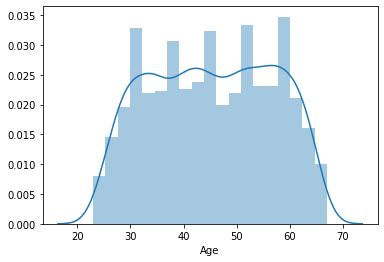

In [30]:
#Age-Symmetric distribution
sns.distplot(x.Age);

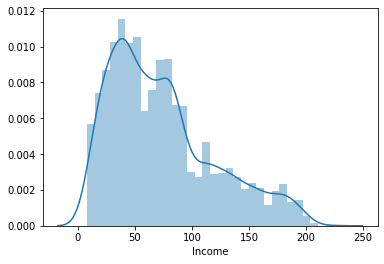

In [31]:
#Income-right skewed distribution
sns.distplot(x.Income)

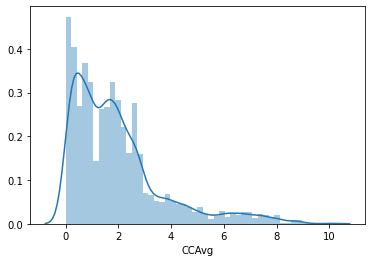

In [32]:
#CCAvg-right skewed distribution
sns.distplot(x.CCAvg)

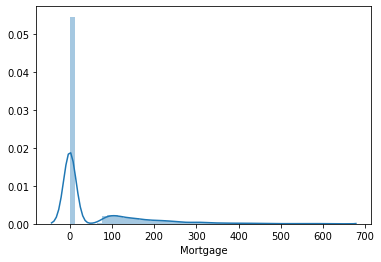

In [33]:
#Mortgage-highly skewed
sns.distplot(x.Mortgage)

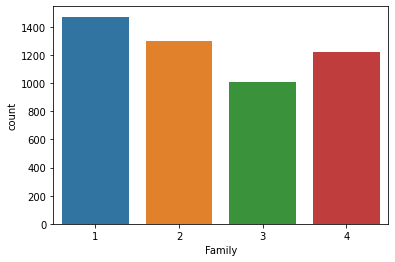

In [34]:
#Family-number of family members
sns.countplot(x.Family)

observation: single members are more in the data

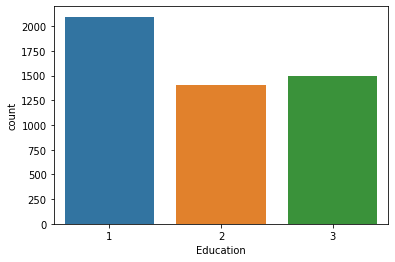

In [35]:
#Education -blue:undergraduate,orange:graduate,green:professional
sns.countplot(x.Education)

observation: undergraduates are more in the data

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


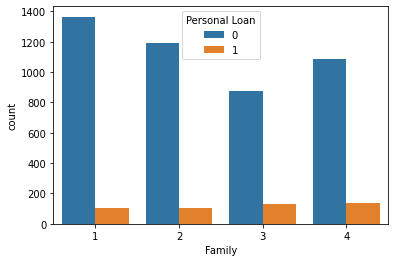

In [36]:
#Family
print(pd.pivot_table(data=x,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=x,hue='Personal Loan')

observation: Family having 4 members have taken more Personal loans

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


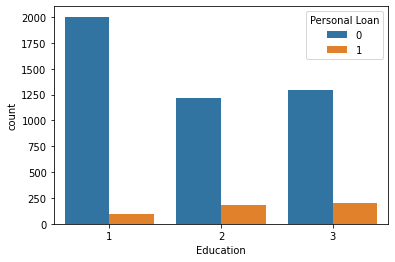

In [37]:
#Education
print(pd.pivot_table(data=x,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=x,hue='Personal Loan')

observation: Persons who are professionals have got more personal loans

0    4520
1     480
Name: Personal Loan, dtype: int64


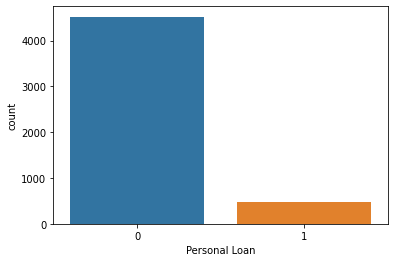

In [38]:
#Personal Loan
print(x['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=x)

observation: only few members got the Personal loan

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


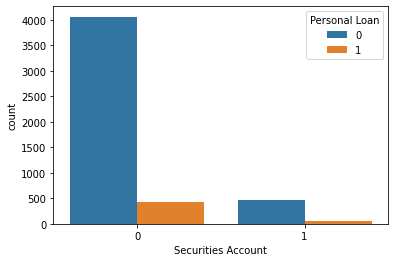

In [39]:
#Securities Account
print(pd.pivot_table(data=x,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=x,hue='Personal Loan')

observation: data has more number of personal loans who does not have securities account with the bank

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


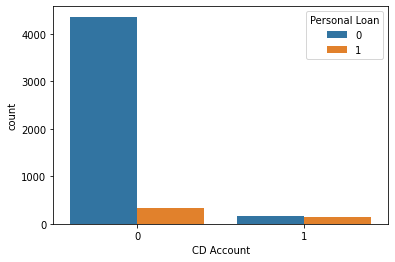

In [40]:
#CD Account
print(pd.pivot_table(data=x,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=x,hue='Personal Loan')

obsevation: More people do not have  certificate of deposit but few of them have taken personal loan,Where as the people who do have  certificate of deposit have almost taken personal loan

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


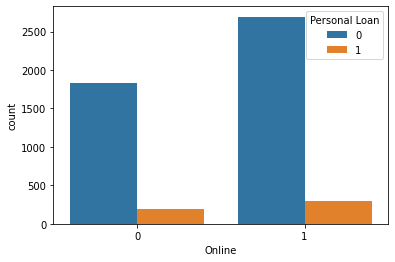

In [41]:
#Online
print(pd.pivot_table(data=x,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=x,hue='Personal Loan')

observation: The people who use internet banking have got more personal loan than the one's who does not use

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


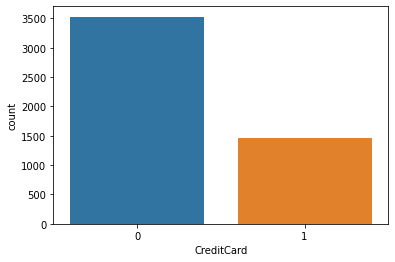

In [42]:
#CreditCard
print(pd.pivot_table(data=x,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=x)

observation: More number of people in the data do not have credit card

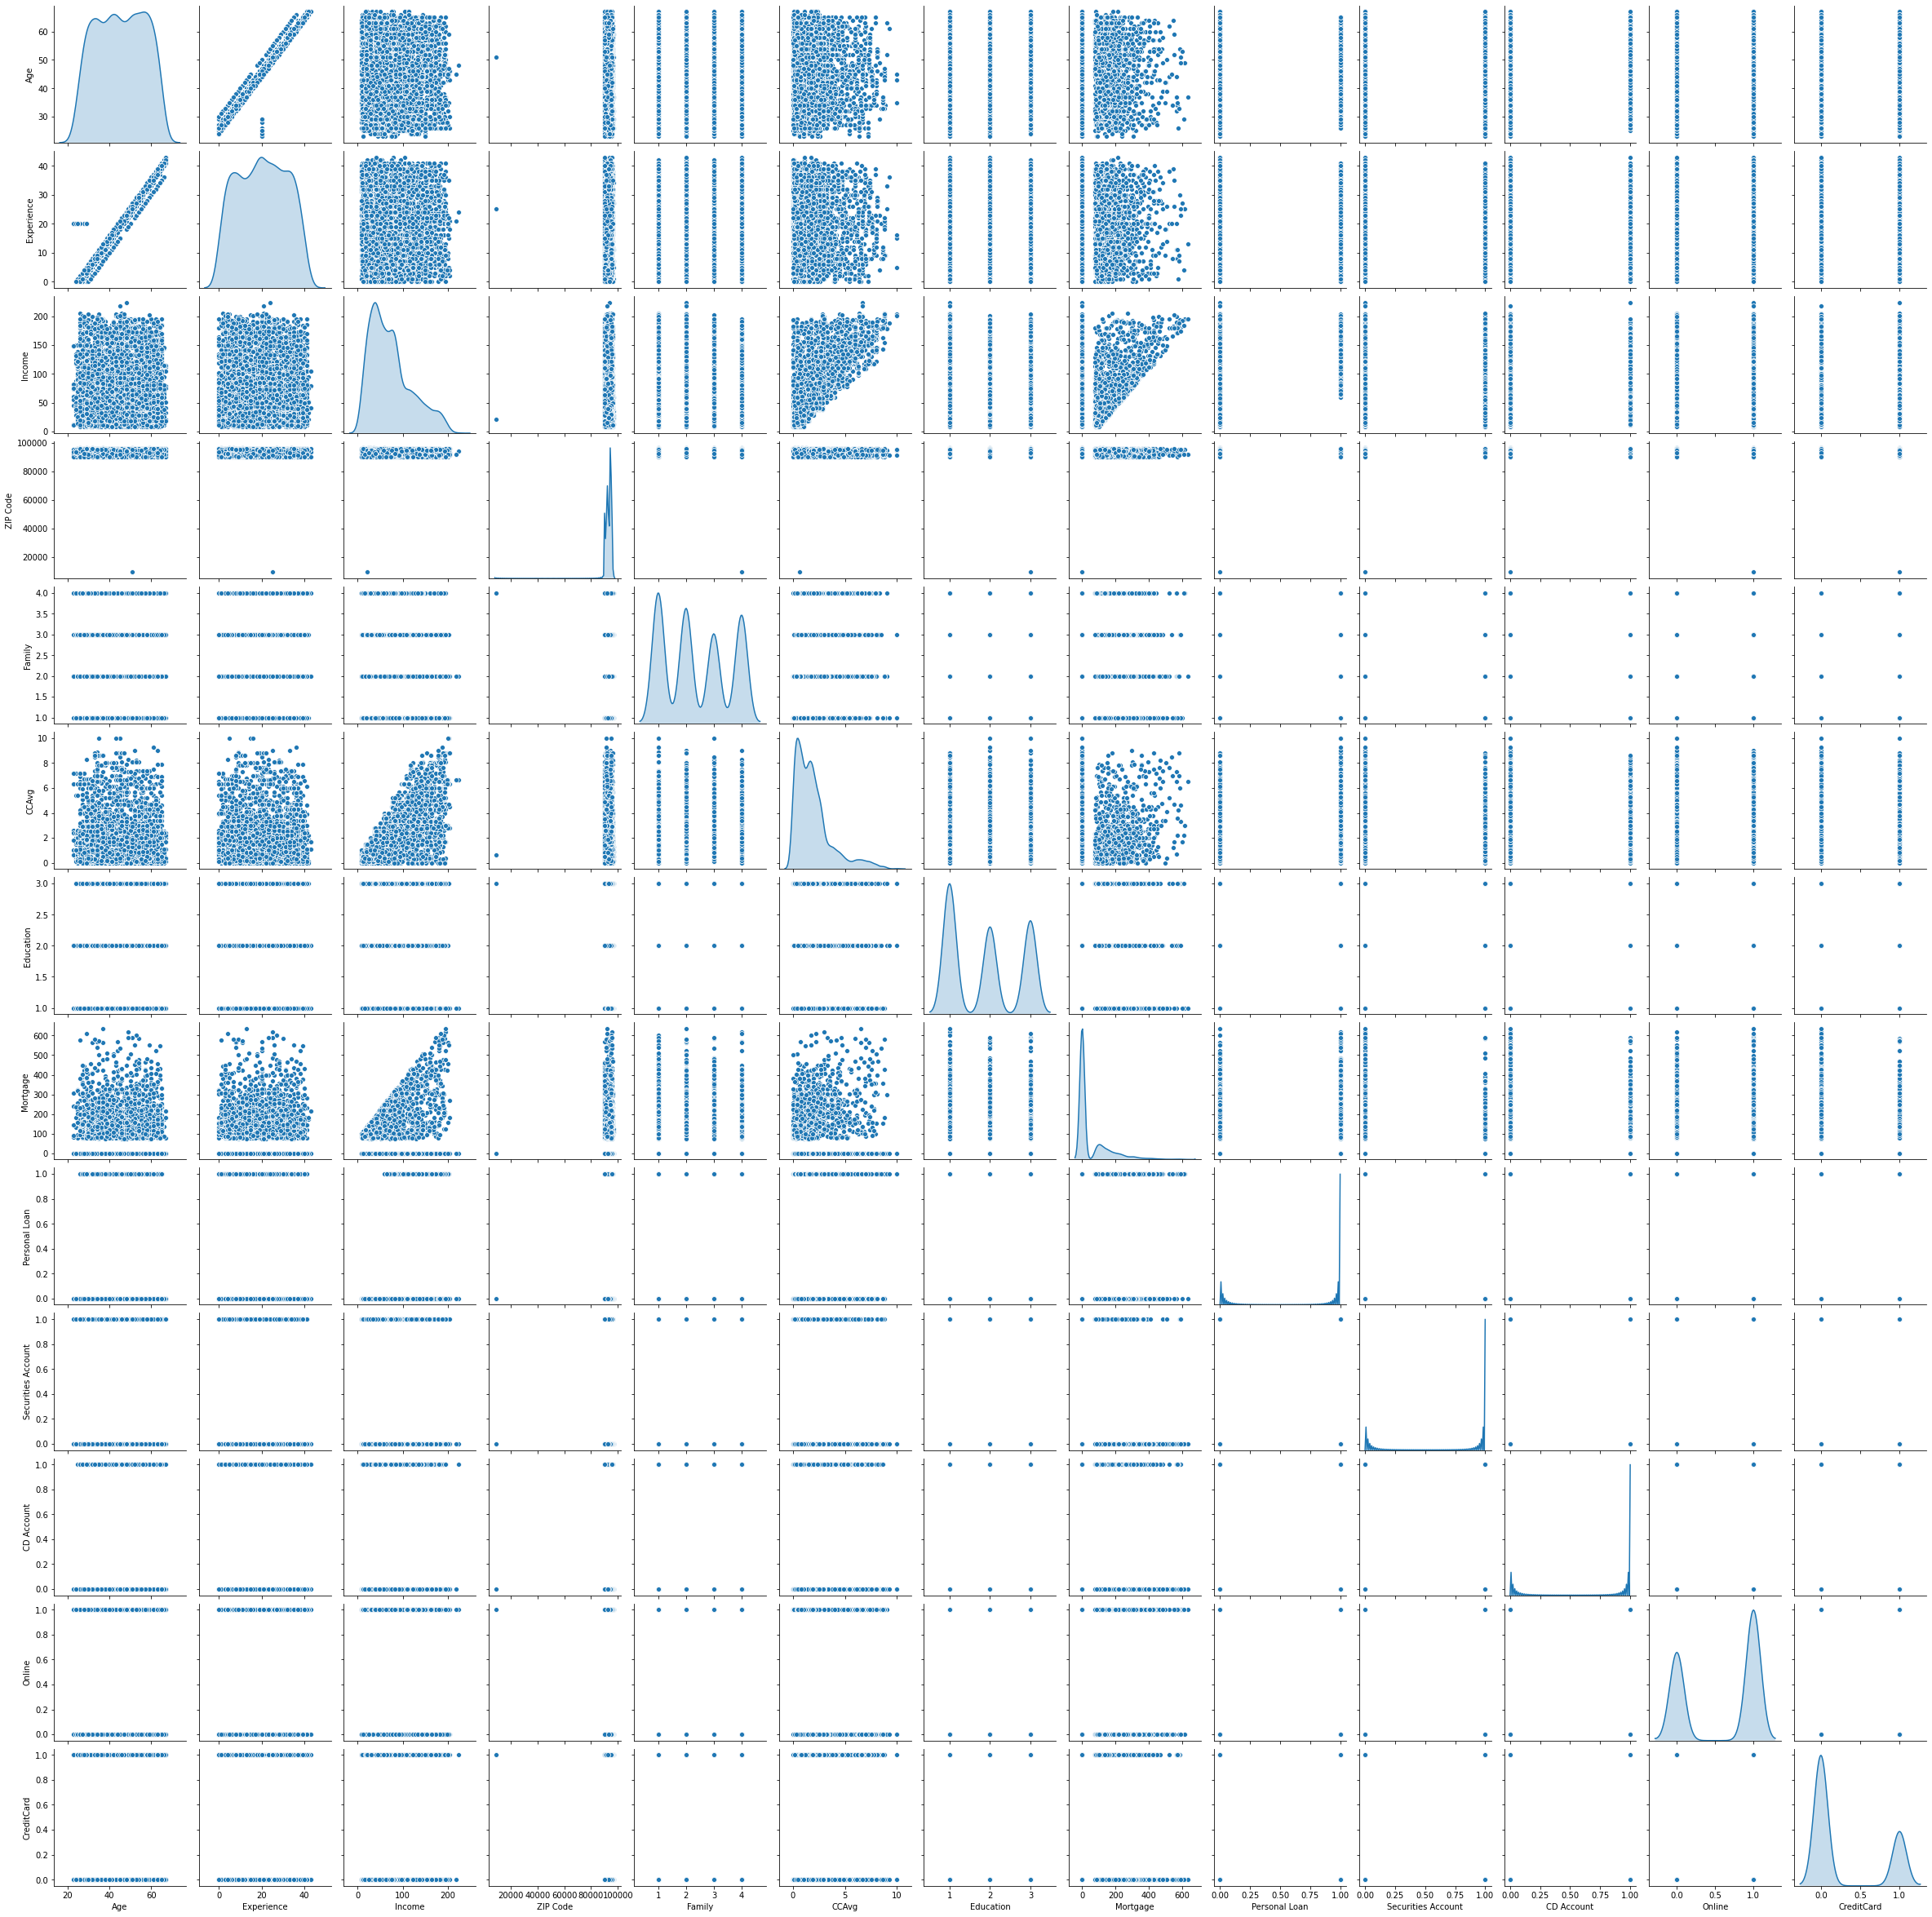

In [43]:
#pairplot
sns.pairplot(x,diag_kind='kde')

observations:
1. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

2. Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

6. The variables family and education are ordinal variables. The distribution of families is evenly distributes

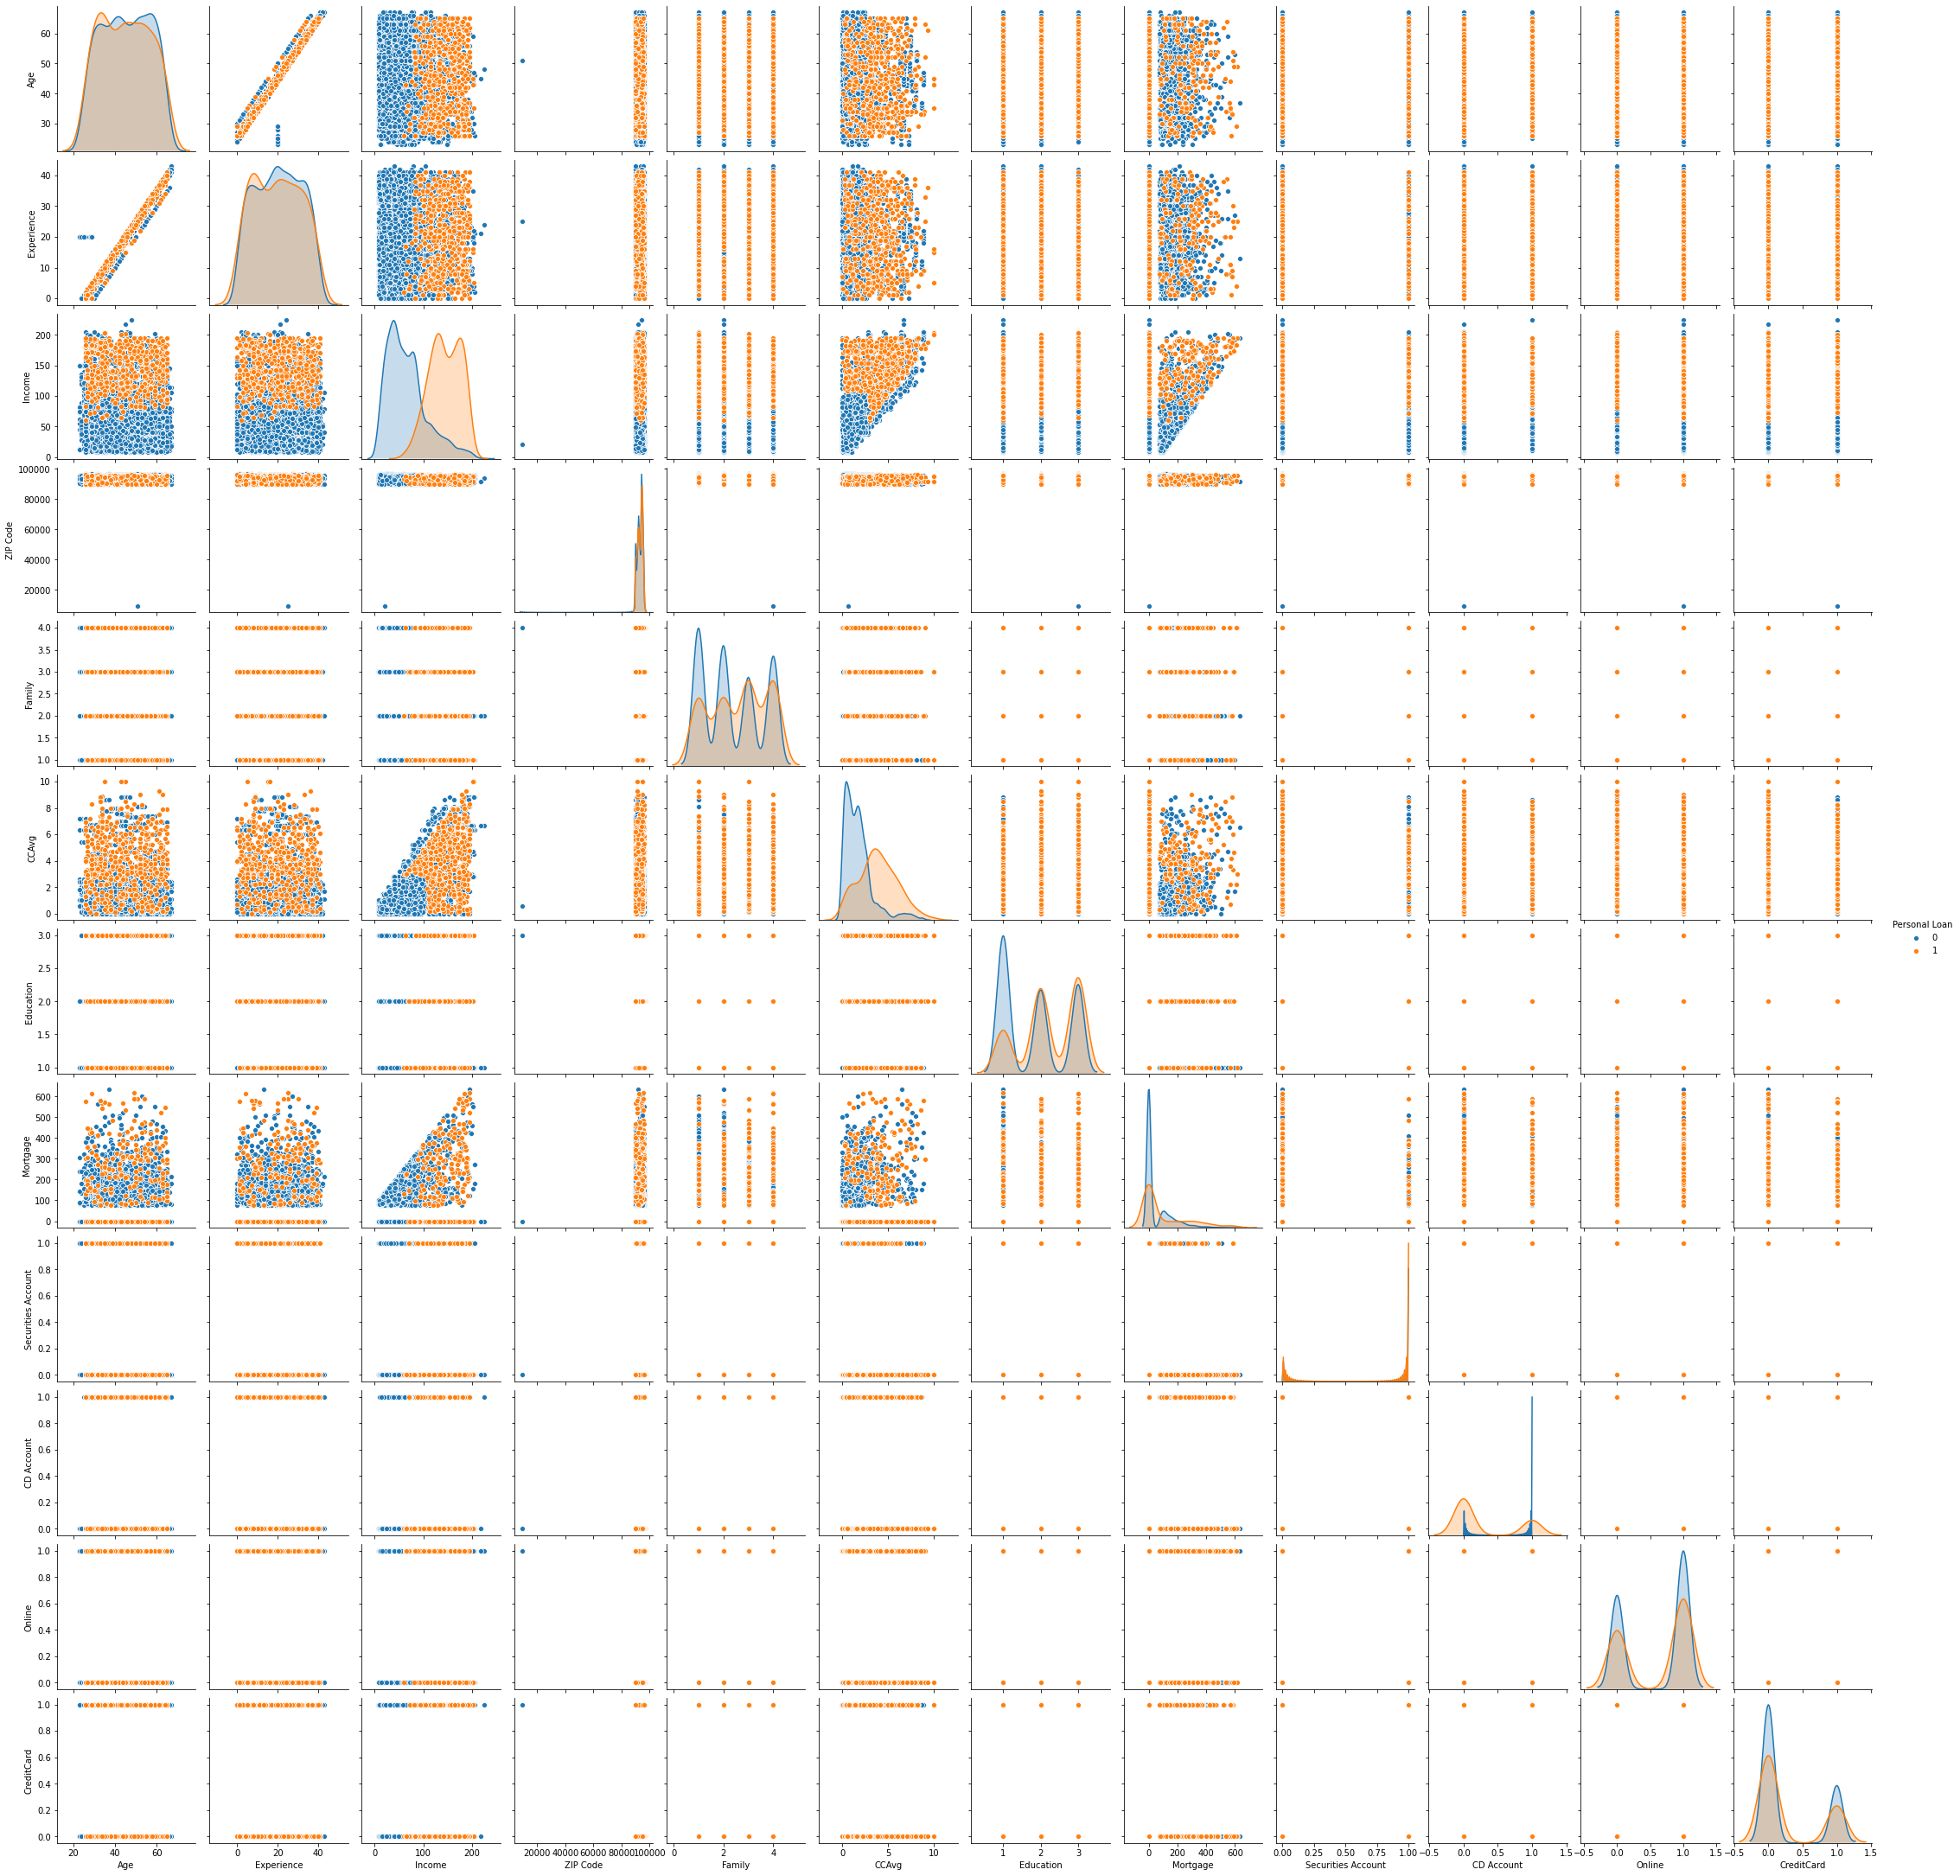

In [44]:
#pairplot hue Personal Loan
sns.pairplot(x,diag_kind='kde',hue='Personal Loan')

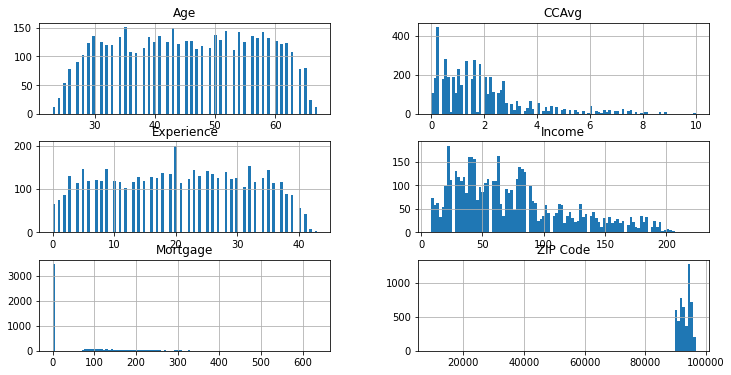

In [45]:
# To see Histogram of all individual data columns
columns = list(x) # Excluding Outcome column  
x[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

observations:
Age and Experience are Symmetrically distributed,Income and CCAvg are right skewed,Mortgage is highly skewed

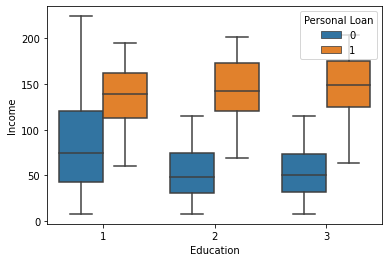

In [46]:
# It seems the customers whose education level is 1 is having more income.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=x)

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

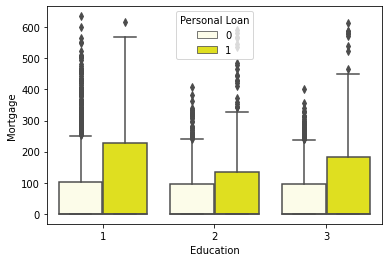

In [47]:
#customer who do not have personal loan and customer who has personal loan have high mortgage
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=x,color='yellow')

observation: it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

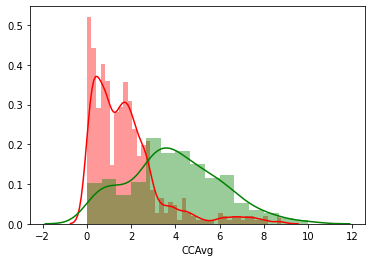

In [48]:
sns.distplot( x[x['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( x[x['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [49]:
print('Credit card spending of Non-Loan customers: ',x[x['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', x[x['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

In [50]:
#Age, it shows variation to those who took personal loan and those who do not.
print(pd.pivot_table(data=x,index='Personal Loan',values='Age',aggfunc=['mean','median']))

                    mean median
                     Age    Age
Personal Loan                  
0              45.367257     45
1              45.066667     45


In [51]:
#Experience, it shows variation to those who took personal loan and those who do not.
print(pd.pivot_table(data=x,index='Personal Loan',values='Experience',aggfunc=['mean','median']))

                    mean     median
              Experience Experience
Personal Loan                      
0              20.378982         20
1              19.843750         20


In [52]:
#Income, it shows variation to those who took personal loan and those who do not. 
print(pd.pivot_table(data=x,index='Personal Loan',values='Income',aggfunc=['mean','median']))

                     mean median
                   Income Income
Personal Loan                   
0               66.237389   59.0
1              144.745833  142.5


In [53]:
#CCAvg, it shows variation to those who took personal loan and those who do not.
print(pd.pivot_table(data=x,index='Personal Loan',values='CCAvg',aggfunc=['mean','median']))

                   mean median
                  CCAvg  CCAvg
Personal Loan                 
0              1.728982    1.4
1              3.905347    3.8


In [54]:
#Mortgage, it shows variation to those who took personal loan and those who do not.
print(pd.pivot_table(data=x,index='Personal Loan',values='Mortgage',aggfunc=['mean','max']))

                     mean      max
                 Mortgage Mortgage
Personal Loan                     
0               51.789381      635
1              100.845833      617


In [55]:
#mean and median 
x.groupby(['Personal Loan']).agg(['mean','median'])

Age        Experience  ...  CCAvg    Mortgage       
                    mean median       mean  ... median        mean median
Personal Loan                               ...                          
0              45.367257     45  20.378982  ...    1.4   51.789381      0
1              45.066667     45  19.843750  ...    3.8  100.845833      0

[2 rows x 12 columns]

In [56]:
#Min and Max values
x.groupby(['Personal Loan']).agg(['min','max'])

Age     Experience     Income  ... ZIP Code CCAvg       Mortgage     
              min max        min max    min  ...      max   min   max      min  max
Personal Loan                                ...                                   
0              23  67          0  43      8  ...    96651   0.0   8.8        0  635
1              26  65          0  41     60  ...    96008   0.0  10.0        0  617

[2 rows x 12 columns]


1.  It is evident from (2.2) that Experience and Age has very high correlation value

2.   Income and CCAvg also have moderate correlation between them



In [57]:
#correlation between age and experience
exp=x['Experience']
age=x['Age']
aec=exp.corr(age)
aec

0.9771816883703435

In [58]:
#correlation between Income and CCAvg
ic=x['Income']
ca=x['CCAvg']
icc=ic.corr(ca)
icc

0.6459925919173631

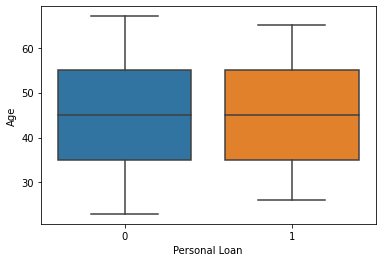

In [59]:
#boxplot of Personal Loan and Age
sns.boxplot(x='Personal Loan',y='Age',data=x)

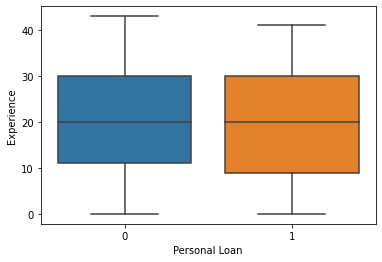

In [60]:
#boxplot of Personal Loan and Experience
sns.boxplot(x='Personal Loan',y='Experience',data=x)

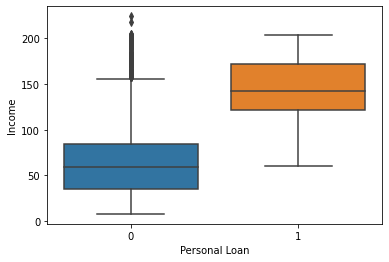

In [61]:
#boxplot of Personal Loan and Income
sns.boxplot(x='Personal Loan',y='Income',data=x)

observation: outliers are there

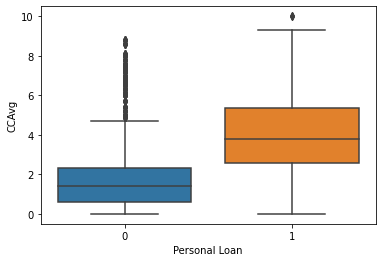

In [62]:
#boxplot of Personal Loan and CCAvg
sns.boxplot(x='Personal Loan',y='CCAvg',data=x)

observation:outliers are present

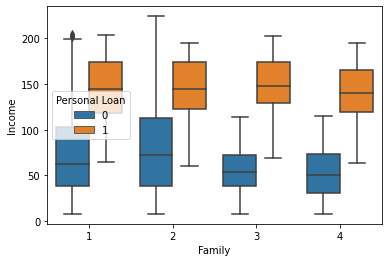

In [63]:
#boxplot
sns.boxplot(x=x.Family,y=x.Income,hue=x['Personal Loan'])

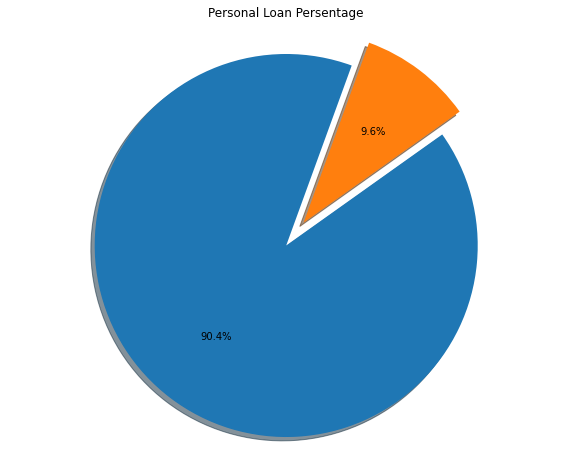

In [64]:
#only few persons got personal loan
abc=pd.DataFrame(x['Personal Loan'].value_counts()).reset_index()
abc.columns=["Labels","Personal Loan"]
fig1, ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(abc["Personal Loan"],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Persentage")
plt.show()

observations:

1. It got 6 numeric variables: ‘Age’, ‘CC_Avg’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
2. It got 2 categorical variables: ‘Education’, ‘Family’
3. It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
4. Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.


4. Apply necessary transformations for the feature variables

Creating dummy variables for family and Education because they are ordinal categorical variables

In [65]:
#Creating family dummy Variables
fa = pd.get_dummies(x['Family'], prefix='Family')
#Adding the results to the master dataframe
a = pd.concat([x,fa], axis=1)

In [66]:
#Creating education dummy Variables
ed = pd.get_dummies(x['Education'], prefix='Education')
#Adding the results to the master dataframe
a = pd.concat([a,ed], axis=1)

In [67]:
# We have created dummies for the below variables, so we can drop them
##df is our new dataset after cleaning and transformation
df=a.drop(['Education','Family'],1)

In [68]:
var=['Securities Account','CD Account','Online','CreditCard','Personal Loan']
df[var]=df[var].astype('int64')

In [69]:
df_X = df.drop(['Personal Loan'], axis=1)
X = df.drop(['Personal Loan'], axis=1)#feature variables
y = df['Personal Loan']

In [70]:
X.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [71]:
y.dtypes

dtype('int64')

In [72]:
y.describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

5. Normalise your data and split the data into training and test set in the ratio of 70:30
respectively

In [73]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, train_size=0.7, test_size=0.3,stratify=y, random_state=0)

In [74]:
#Feature Scaling library
from sklearn.preprocessing import StandardScaler

In [75]:
#Applying Scaling to training set
scaler = StandardScaler()
X_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg']])
X_test[['Age','Experience','Income','CCAvg']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg']])

In [76]:
#Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [77]:
#Recursive Feature Elimination
df_vars=df.columns.values.tolist()
y=['y']
X=[i for i in df_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


6. Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans

In [78]:
#ITERATION 1 - Fitting all the features in the first iteration
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.110151
         Iterations 9
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.652      
Dependent Variable:      Personal Loan         AIC:                   803.0592   
Date:                    2020-09-03 02:10      BIC:                   901.6275   
No. Observations:        3500                  Log-Likelihood:        -385.53    
Df Model:                15                    LL-Null:               -1106.7    
Df Residuals:            3484                  LLR p-value:           1.2663e-298
Converged:               1.0000                Scale:                 1.0000     
No. Iterations:          9.0000                                                  
---------------------------------------------------------------------------------
                    Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
------------------------------

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
#dropping Family_2 and Education_1 in iteration 2 as they have high coef. value
X_train1 = X_train.drop(['Family_2','Education_1'], axis=1)

In [81]:
#ITERATION 2
logit_model=sm.Logit(y_train,X_train1)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.110752
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.650      
Dependent Variable:  Personal Loan    AIC:              805.2652   
Date:                2020-09-03 02:11 BIC:              897.6730   
No. Observations:    3500             Log-Likelihood:   -387.63    
Df Model:            14               LL-Null:          -1106.7    
Df Residuals:        3485             LLR p-value:      9.8564e-299
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                 0.7736   0.6017   1.2856 0.1986 -0.4057  1.9528
Experience         -0.6797   0.5925  -1.1

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,21.78
1,Experience,21.73
3,ZIP Code,7.49
8,Online,2.51
10,Family_1,2.16
12,Family_4,2.02
2,Income,1.88
11,Family_3,1.87
14,Education_3,1.78
13,Education_2,1.74


In [83]:
#dropping Age as it has high VIF value and its very strongly correlated to Experience in correlation matrix
X_train1 = X_train.drop(['Family_2','Education_1','Age'],axis=1)


In [84]:
#ITERATION 3
logit_model=sm.Logit(y_train,X_train1)
result3=logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.111044
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.649      
Dependent Variable:  Personal Loan    AIC:              805.3070   
Date:                2020-09-03 02:11 BIC:              891.5543   
No. Observations:    3500             Log-Likelihood:   -388.65    
Df Model:            13               LL-Null:          -1106.7    
Df Residuals:        3486             LLR p-value:      2.5301e-299
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.0725   0.0948   0.7645 0.4446 -0.1133  0.2582
Income              2.9963   0.1779  16.8

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ZIP Code,7.46
7,Online,2.51
9,Family_1,2.15
11,Family_4,2.02
1,Income,1.87
10,Family_3,1.86
13,Education_3,1.76
12,Education_2,1.74
3,CCAvg,1.72
8,CreditCard,1.58


In [86]:
#dropping Mortgage as it high p value and as in most cases house is not mortgaged.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage'],axis=1)

In [87]:
#ITERATION 4
logit_model=sm.Logit(y_train,X_train1)
result4=logit_model.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.111063
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.649      
Dependent Variable:  Personal Loan    AIC:              803.4436   
Date:                2020-09-03 02:11 BIC:              883.5304   
No. Observations:    3500             Log-Likelihood:   -388.72    
Df Model:            12               LL-Null:          -1106.7    
Df Residuals:        3487             LLR p-value:      2.4223e-300
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.0723   0.0948   0.7628 0.4456 -0.1135  0.2581
Income              2.9861   0.1755  17.0

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ZIP Code,7.05
6,Online,2.51
8,Family_1,2.15
10,Family_4,2.02
9,Family_3,1.86
1,Income,1.82
12,Education_3,1.76
11,Education_2,1.74
3,CCAvg,1.72
7,CreditCard,1.57


In [89]:
#dropping ZIP code as it has high VIF value and it has more number of unique values
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code'],axis=1)


In [90]:
#ITERATION 5
logit_model=sm.Logit(y_train,X_train1)
result5=logit_model.fit()
print(result5.summary2())

Optimization terminated successfully.
         Current function value: 0.247912
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.216     
Dependent Variable:   Personal Loan    AIC:              1759.3869 
Date:                 2020-09-03 02:12 BIC:              1833.3131 
No. Observations:     3500             Log-Likelihood:   -867.69   
Df Model:             11               LL-Null:          -1106.7   
Df Residuals:         3488             LLR p-value:      1.5376e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.0055   0.0612   0.0904 0.9280 -0.1144  0.1254
Income              1.2480   0.0795  15.7

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Online,2.01
1,Income,1.79
2,CCAvg,1.72
9,Family_4,1.58
7,Family_1,1.57
10,Education_2,1.55
11,Education_3,1.52
8,Family_3,1.47
6,CreditCard,1.44
4,CD Account,1.39


In [92]:
#dropping CCAvg as it has high value of p and also has strong correlation with Incom
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg'],axis=1)

#ITERATION 6
logit_model=sm.Logit(y_train,X_train1)
result6=logit_model.fit()
print(result6.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.247978
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.216     
Dependent Variable:   Personal Loan    AIC:              1757.8451 
Date:                 2020-09-03 02:12 BIC:              1825.6108 
No. Observations:     3500             Log-Likelihood:   -867.92   
Df Model:             10               LL-Null:          -1106.7   
Df Residuals:         3489             LLR p-value:      2.7114e-96
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.0042   0.0611   0.0680 0.9458 -0.1156  0.1240
Income              1.2775   0.0667  19.1

,Features,VIF
4,Online,2.01
8,Family_4,1.58
6,Family_1,1.57
9,Education_2,1.55
10,Education_3,1.52
7,Family_3,1.47
5,CreditCard,1.44
3,CD Account,1.39
2,Securities Account,1.25
1,Income,1.09


In [93]:
#dropping Education_2  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        ],
                        axis=1)

#ITERATION 7
logit_model=sm.Logit(y_train,X_train1)
result7=logit_model.fit()
print(result7.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.248071
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.215     
Dependent Variable:   Personal Loan    AIC:              1756.4937 
Date:                 2020-09-03 02:12 BIC:              1818.0989 
No. Observations:     3500             Log-Likelihood:   -868.25   
Df Model:             9                LL-Null:          -1106.7   
Df Residuals:         3490             LLR p-value:      4.9730e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.0034   0.0611   0.0562 0.9552 -0.1163  0.1232
Income              1.2714   0.0662  19.2

,Features,VIF
4,Online,1.96
6,Family_1,1.48
5,CreditCard,1.43
8,Family_4,1.43
3,CD Account,1.39
9,Education_3,1.34
7,Family_3,1.32
2,Securities Account,1.25
1,Income,1.07
0,Experience,1.01


In [94]:
#dropping Education_3  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3'],axis=1)

#ITERATION 8
logit_model=sm.Logit(y_train,X_train1)
result8=logit_model.fit()
print(result8.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.248131
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.215     
Dependent Variable:   Personal Loan    AIC:              1754.9139 
Date:                 2020-09-03 02:12 BIC:              1810.3586 
No. Observations:     3500             Log-Likelihood:   -868.46   
Df Model:             8                LL-Null:          -1106.7   
Df Residuals:         3491             LLR p-value:      7.6663e-98
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.0043   0.0611   0.0709 0.9435 -0.1153  0.1240
Income              1.2685   0.0659  19.2

,Features,VIF
4,Online,1.93
5,CreditCard,1.43
6,Family_1,1.40
3,CD Account,1.39
8,Family_4,1.37
7,Family_3,1.29
2,Securities Account,1.25
1,Income,1.07
0,Experience,1.01


In [95]:
#dropping Experience as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)

#ITERATION 9
logit_model=sm.Logit(y_train,X_train1)
result9=logit_model.fit()
print(result9.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.248131
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.215     
Dependent Variable:   Personal Loan    AIC:              1752.9190 
Date:                 2020-09-03 02:13 BIC:              1802.2031 
No. Observations:     3500             Log-Likelihood:   -868.46   
Df Model:             7                LL-Null:          -1106.7   
Df Residuals:         3492             LLR p-value:      8.9702e-99
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              1.2682   0.0658  19.2664 0.0000  1.1392  1.3973
Securities Account -2.0715   0.2774  -7.4

,Features,VIF
3,Online,1.93
4,CreditCard,1.43
5,Family_1,1.40
2,CD Account,1.39
7,Family_4,1.37
6,Family_3,1.29
1,Securities Account,1.25
0,Income,1.06


Now all the features are significant and VIF is also fine. Selecting these variables to predict the result.
                                                

Logistic Regression Model Fitting

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=100)
logreg.fit(X_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
#Fitting the model on test data
X_test1 = X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)
X_test1.columns

Index(['Income', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Family_1', 'Family_3', 'Family_4'],
      dtype='object')

In [98]:
y_pred = logreg.predict(X_test1)

In [99]:
#Accuracy for train set
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train1, y_train)))

Accuracy of logistic regression classifier on train set: 0.94


Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1332   24]
 [  67   77]]




1.   true positives (TP=77): These are cases in which we predicted yes, and actually took loan.


2.   true negatives (TN=1332): We predicted no, and they actually did not took loan.

3.   false positives (FP=24): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")



4.   false negatives (FN=67): We predicted no, but they actually took loan.(Also known as a "Type II error.")




7. Print all the metrics related for evaluating the model performance

In [101]:
TP=77
TN=1332
FP=24
FN=67

In [102]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))



Accuracy of logistic regression classifier on test set: 93.93%
Misclassification Rate: It is often wrong: 6.07%
Sensitivity: When its actually yes how often it predicts yes: 53.47%
Specificity: When its actually no, how often does it predict no: 98.23%
Precision: When it predicts yes, how often is it correct: 76.24%


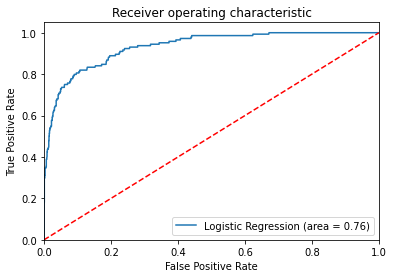

In [103]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

1.   Sensitivity value is too low, this may be due to data we have. Which contains only 480 records which are 
yes, it seems model needs more data to train itself.
2.   Specificity seems fine
3.   More the area under ROC better the model performs, its 0.75 in this case. Model is ok but lets see if this could be improved further specially Sesitivity




In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1356
           1       0.76      0.53      0.63       144

    accuracy                           0.94      1500
   macro avg       0.86      0.76      0.80      1500
weighted avg       0.93      0.94      0.93      1500



In [105]:
y_pred_1 = pd.DataFrame(y_pred)
y_pred_1.head()

,0
0,1
1,0
2,0
3,0
4,0


For logistic regression model:
1. Accuracy for train model is 94%
2. Accuracy for test model is 93.93%

8. Build various other classification algorithms and compare their performance

Applying KNN Model

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
#Using X_train dataframe as it was final data after cleaning, apply scaling and splitting
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)

In [109]:
NNH.score(X_test, y_test)

0.91

In [110]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1349    7]
 [ 128   16]]


In [111]:
TP=16
TN=1349
FP=7
FN=128

In [114]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of test set before deleting the columns according to logistic regression fitting : {:.2%}'.format(Accuracy))


Accuracy of test set before deleting the columns according to logistic regression fitting : 91.00%


In [115]:
#Iteration 1:Using same features as derived in above Logistic model, we perofrmance getting improved

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH1.fit(X_train1, y_train)

predicted_labels_KNN = NNH1.predict(X_test1)

NNH1.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1337   19]
 [  69   75]]


CALCULATING METRICES FOR CHECKING MODEL
1.   true positives (TP=75): These are cases in which we predicted yes, and actually took loan.
2.   true negatives (TN=1337): We predicted no, and they actually did not took loan.
3.   false positives (FP=19): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
4.   false negatives (FN=69): We predicted no, but they actually took loan.(Also known as a "Type II error.")





In [117]:
TP=75
TN=1337
FP=19
FN=69

In [118]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of test set: 94.13%
Misclassification Rate: It is often wrong: 5.87%
Sensitivity: When its actually yes how often it predicts yes: 52.08%
Specificity: When its actually no, how often does it predict no: 98.60%
Precision: When it predicts yes, how often is it correct: 79.79%


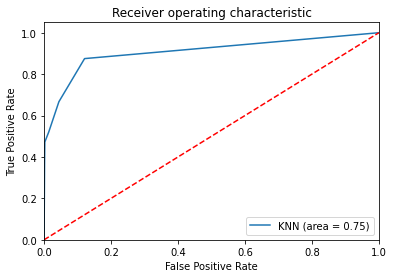

In [120]:
#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, NNH1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [121]:
#Iteration 2:Using same features as derived in above Logistic model, however taking neighbours as 9

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH2 = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform' )
NNH2.fit(X_train1, y_train)

predicted_labels_KNN = NNH2.predict(X_test1)

NNH2.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1345   11]
 [  69   75]]


In [122]:
TP=75
TN=1345
FP=11
FN=69

Accuracy of  test set: 94.67%
Misclassification Rate: It is often wrong: 5.33%
Sensitivity: When its actually yes how often it predicts yes: 52.08%
Specificity: When its actually no, how often does it predict no: 99.19%
Precision: When it predicts yes, how often is it correct: 87.21%


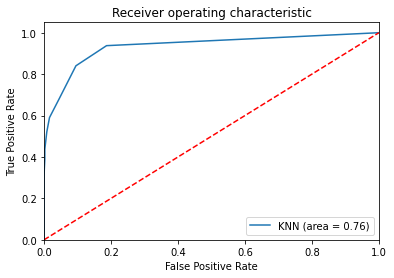

In [123]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of  test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, NNH2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels_KNN))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.87      0.52      0.65       144

    accuracy                           0.95      1500
   macro avg       0.91      0.76      0.81      1500
weighted avg       0.94      0.95      0.94      1500



Model has improved with KNN and n_neighbours as 9, also ROC and AUC have improved

In [125]:
predicted_labels_KNN = NNH2.predict(X_train1)
print(metrics.confusion_matrix(y_train, predicted_labels_KNN))

[[3152   12]
 [ 136  200]]


In [126]:
TP=200
TN=3152
FP=12
FN=136

In [127]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy  on train set: {:.2%}'.format(Accuracy))

Accuracy  on train set: 95.77%


For KNN model:
1. Accuracy for train model is 95.77%
2. Accuracy for test model is 94.67%

Applying Gaussian Naive Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB

In [129]:
#Iteration 1 - Fitting all variables, cleaned and normalized data
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

GNB1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))


[[1274   82]
 [  56   88]]


In [130]:
TP=88
TN=1274
FP=82
FN=56

In [131]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy  on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy  on test set: 90.80%
Misclassification Rate: It is often wrong: 9.20%
Sensitivity: When its actually yes how often it predicts yes: 61.11%
Specificity: When its actually no, how often does it predict no: 93.95%
Precision: When it predicts yes, how often is it correct: 51.76%


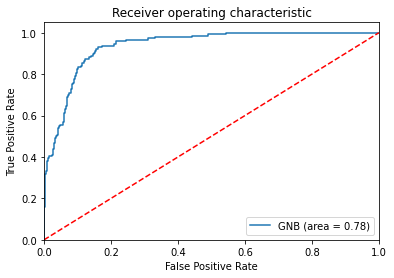

In [132]:
#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [133]:
#Iteration 2 - Dropping all variables as found in Logistic Regression
X_train1=X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],1)
X_test1= X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],axis=1)

GNB2 = GaussianNB()
GNB2.fit(X_train1, y_train)
predicted_labels_GNB = GNB2.predict(X_test1)

GNB2.score(X_test1, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

[[1292   64]
 [  76   68]]


In [134]:
TP=68
TN=1292
FP=64
FN=76

In [135]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of test set: 90.67%
Misclassification Rate: It is often wrong: 9.33%
Sensitivity: When its actually yes how often it predicts yes: 47.22%
Specificity: When its actually no, how often does it predict no: 95.28%
Precision: When it predicts yes, how often is it correct: 51.52%


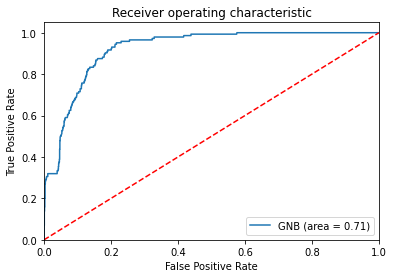

In [136]:
#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, GNB2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels_GNB))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1356
           1       0.52      0.47      0.49       144

    accuracy                           0.91      1500
   macro avg       0.73      0.71      0.72      1500
weighted avg       0.90      0.91      0.90      1500



In [138]:
predicted_labels_GNB = GNB2.predict(X_train1)
print(metrics.confusion_matrix(y_train, predicted_labels_GNB))

[[3019  145]
 [ 187  149]]


In [139]:
TP=149
TN=3019
FP=145
FN=187

In [140]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of train set: {:.2%}'.format(Accuracy))

Accuracy of train set: 90.51%


For Gaussian Naive Bayes:
1. Accuracy for train set is 90.51%
2. Accuracy for test set is 90.67%

In Gaussian Naive Bayes accuracy of test set is more than train set may be because noise has been taken

Applying DecisionTreeClassifier

In [141]:
# Before removing features according to logistic regression
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100)


clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[1350    6]
 [  16  128]]


In [142]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9853333333333333


In [143]:
TP=128
TN=1350
FP=6
FN=16

In [144]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of test set: 98.53%
Misclassification Rate: It is often wrong: 1.47%
Sensitivity: When its actually yes how often it predicts yes: 88.89%
Specificity: When its actually no, how often does it predict no: 99.56%
Precision: When it predicts yes, how often is it correct: 95.52%


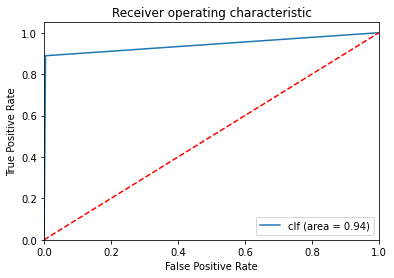

In [145]:
#ROC Curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='clf (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [146]:
# Create Decision Tree classifer object
#features taken according to logistic regression model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.94
[[1338   18]
 [  72   72]]


In [147]:
TP=72
TN=1338
FP=18
FN=72

In [148]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of classifier on test set: 94.00%
Misclassification Rate: It is often wrong: 6.00%
Sensitivity: When its actually yes how often it predicts yes: 50.00%
Specificity: When its actually no, how often does it predict no: 98.67%
Precision: When it predicts yes, how often is it correct: 80.00%


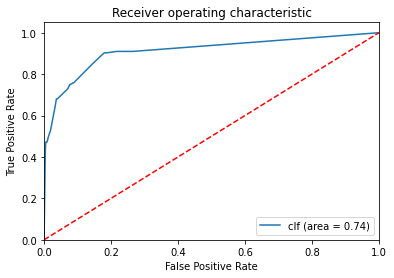

In [149]:
#ROC Curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='clf (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.80      0.50      0.62       144

    accuracy                           0.94      1500
   macro avg       0.87      0.74      0.79      1500
weighted avg       0.93      0.94      0.93      1500



In [151]:
y_pred = clf.predict(X_train1)
print("Accuracy of train set:",metrics.accuracy_score(y_train, y_pred))

Accuracy of train set: 0.9605714285714285


For Decision Tree Classifiers model:
1. Accuracy for train set is 96.05%
2. Accuracy for test set is 94.0%

Applying Random forest Classifiers Model

In [152]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [153]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9893333333333333


In [155]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1355    1]
 [  15  129]]


In [ ]:
TP=129
TN=1355
FP=1
FN=15

Accuracy of classifier on test set: 94.00%
Misclassification Rate: It is often wrong: 6.00%
Sensitivity: When its actually yes how often it predicts yes: 50.00%
Specificity: When its actually no, how often does it predict no: 98.67%
Precision: When it predicts yes, how often is it correct: 80.00%


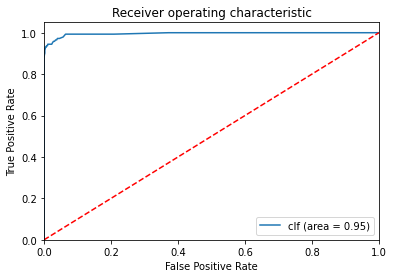

In [156]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
clf_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='clf (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [157]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model which have taken features according to logestic regression
clf.fit(X_train1,y_train)

# prediction on test set
y_pred=clf.predict(X_test1)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9346666666666666


In [158]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1320   36]
 [  62   82]]


In [159]:
TP=82
TN=1320
FP=36
FN=62

Accuracy of  test set: 93.47%
Misclassification Rate: It is often wrong: 6.53%
Sensitivity: When its actually yes how often it predicts yes: 56.94%
Specificity: When its actually no, how often does it predict no: 97.35%
Precision: When it predicts yes, how often is it correct: 69.49%


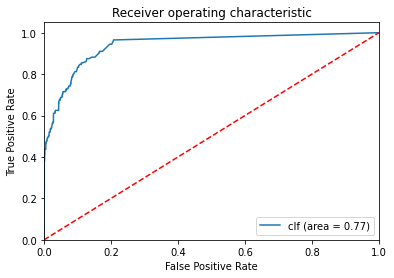

In [160]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of  test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
clf_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='clf (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1356
           1       0.69      0.57      0.63       144

    accuracy                           0.93      1500
   macro avg       0.83      0.77      0.80      1500
weighted avg       0.93      0.93      0.93      1500



In [162]:
y_pred = clf.predict(X_train1)
print("Accuracy of train set:",metrics.accuracy_score(y_train, y_pred))

Accuracy of train set: 0.9808571428571429


For Random Forest :
1. Accuracy for train set is 98%
2. Accuracy for test set is 93.47%

Applying Support Vector Machine Model

In [163]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train,y_train) 



y_pred=clf.predict(X_test) 
print(metrics.confusion_matrix(y_test, y_pred))

[[1354    2]
 [ 140    4]]


In [164]:
TP=4
TN=1354
FP=2
FN=140

In [165]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of  test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))



Accuracy of  test set: 90.53%
Misclassification Rate: It is often wrong: 9.47%
Sensitivity: When its actually yes how often it predicts yes: 2.78%
Specificity: When its actually no, how often does it predict no: 99.85%
Precision: When it predicts yes, how often is it correct: 66.67%


In [166]:
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train1,y_train) 



y_pred=clf.predict(X_test1) 
print(metrics.confusion_matrix(y_test, y_pred))

[[1341   15]
 [  76   68]]


In [167]:
TP=68
TN=1341
FP=15
FN=76

In [168]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of  test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of  test set: 93.93%
Misclassification Rate: It is often wrong: 6.07%
Sensitivity: When its actually yes how often it predicts yes: 47.22%
Specificity: When its actually no, how often does it predict no: 98.89%
Precision: When it predicts yes, how often is it correct: 81.93%


In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.82      0.47      0.60       144

    accuracy                           0.94      1500
   macro avg       0.88      0.73      0.78      1500
weighted avg       0.93      0.94      0.93      1500



In [170]:
y_pred = clf.predict(X_train1)
print("Accuracy of train set:",metrics.accuracy_score(y_train, y_pred))

Accuracy of train set: 0.9474285714285714


For Support Vector Machine:
1. Accuracy for train set is 94.74%
2. Accuracy for test set is 93.93%

 comparasion of different models performance

1. Logestic Regression:
    1. Accuracy of logistic regression classifier on test set: 93.93%
    2. Misclassification Rate: It is often wrong: 6.07%
    3. Sensitivity: When its actually yes how often it predicts yes: 53.47%
    4. Specificity: When its actually no, how often does it predict no: 98.23%
    5. Precision: When it predicts yes, how often is it correct: 76.24%
    

                  precision    recall  f1-score   support

           0           0.95      0.98      0.97      1356
           1           0.76      0.53      0.63       144

      accuracy                             0.94      1500
    macro avg          0.86      0.76      0.80      1500
    weighted avg       0.93      0.94      0.93      1500




2. KNN Model:
    1. Accuracy of test set: 94.67%
    2. Misclassification Rate: It is often wrong: 5.33%
    3. Sensitivity: When its actually yes how often it predicts yes: 52.08%
    4. Specificity: When its actually no, how often does it predict no: 99.19%
    5. Precision: When it predicts yes, how often is it correct: 87.21%
     

                 
                     precision    recall  f1-score   support

           0           0.95      0.99      0.97      1356
           1           0.87      0.52      0.65       144

    accuracy                               0.95      1500
    macro avg          0.91      0.76      0.81      1500
    weighted avg       0.94      0.95      0.94      1500
 



3. Naive Bayes Model:
    1. Accuracy of test set: 90.67%
    2. Misclassification Rate: It is often wrong: 9.33%
    3. Sensitivity: When its actually yes how often it predicts yes: 47.22%
    4. Specificity: When its actually no, how often does it predict no: 95.28%
    5. Precision: When it predicts yes, how often is it correct: 51.52%
                   

              
                    precision    recall  f1-score   support

           0           0.94      0.95      0.95      1356
           1           0.52      0.47      0.49       144

    accuracy                               0.91      1500
    macro avg          0.73      0.71      0.72      1500
    weighted avg       0.90      0.91      0.90      1500


4. Decision Trees:
    1. Accuracy of classifier on test set: 94.00%
    2. Misclassification Rate: It is often wrong: 6.00%
    3. Sensitivity: When its actually yes how often it predicts yes: 50.00%
    4. Specificity: When its actually no, how often does it predict no: 98.67%
    5. Precision: When it predicts yes, how often is it correct: 80.00%


                    precision    recall  f1-score   support

           0           0.95      0.99      0.97      1356
           1           0.80      0.50      0.62       144

    accuracy                               0.94      1500
    macro avg          0.87      0.74      0.79      1500
    weighted avg       0.93      0.94      0.93      1500

5. Random Forest:
    1. Accuracy of  test set: 93.47%
    2. Misclassification Rate: It is often wrong: 6.53%
    3. Sensitivity: When its actually yes how often it predicts yes: 56.94%
    4. Specificity: When its actually no, how often does it predict no: 97.35%
    5. Precision: When it predicts yes, how often is it correct: 69.49%


                  precision    recall  f1-score   support

           0           0.96      0.97      0.96      1356
           1           0.69      0.57      0.63       144

    accuracy                               0.93      1500
    macro avg          0.83      0.77      0.80      1500
    weighted avg       0.93      0.93      0.93      1500
6. Support Vector Machine Model:
    1. Accuracy of  test set: 93.93%
    2. Misclassification Rate: It is often wrong: 6.07%
    3. Sensitivity: When its actually yes how often it predicts yes: 47.22%
    4. Specificity: When its actually no, how often does it predict no: 98.89%
    5. Precision: When it predicts yes, how often is it correct: 81.93%


                    precision    recall  f1-score   support

           0           0.95      0.99      0.97      1356
           1           0.82      0.47      0.60       144

    accuracy                               0.94      1500
    macro avg          0.88      0.73      0.78      1500
    weighted avg       0.93      0.94      0.93      1500







    


    

KNN model performs the best, evident from above results. However, Sensitivity is greater in Random forest.


9. Give a business understanding of your model

All the Observations and views:
1. 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
2. Around 29% of the customer’s family size is 1.
3. 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
4. Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
5. Around 60% of customers use internet banking facilities.
6. Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
7. Around 90% of the customer doesn’t have a securities account with the bank.
8. The mean age of the customers is 45 with standard deviation of 11.5.  Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
9. The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
10. The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
11. The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)
12. high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
13. More the number of earning family members, less probability of buying personal loans.
14. Customers with probably the age of 30–50 will buy personal loans.
15. The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

Conclusion for the model implemented:

---


KNN model has the best performance with accuracy of 94.67%. If we apply the model and change our approach and target only those predicted as yes first, it is 87% (Precision) chance they will take loan. 

 Hence our chances that a person takes personal loan increases.
 Though our Sensitivity is around 52.2% still we end up offering more loans at end of program